In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d
import numpy as np

In [36]:
Use Pandas to import the data from epa-sea-level.csv.
Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

SyntaxError: invalid syntax (3106558730.py, line 1)

171
171


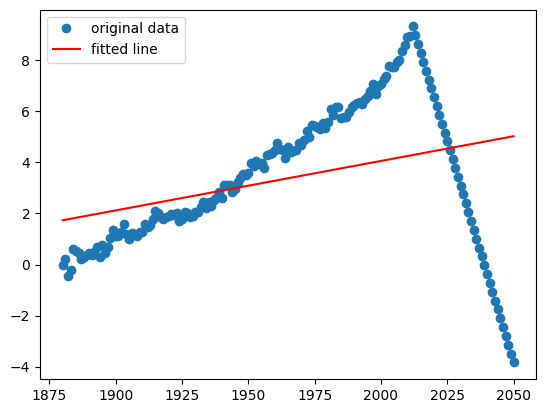

In [37]:
df = pd.read_csv('epa-sea-level.csv')
df.head()
#matplotlib: create scatter plot
# x: Year 
# y: CSIRO Adjusted Sea Level

scatter_df = df[['Year', 'CSIRO Adjusted Sea Level']]
#no null values
scatter_df.isna().any()
x = scatter_df['Year']
y=scatter_df['CSIRO Adjusted Sea Level']
extrap_range = np.linspace(x[0], 2050, 2050-x[0] + 1)

extrapolate_obj = interp1d(x, y, fill_value = "extrapolate")
extrap_y = extrapolate_obj(extrap_range)
print(len(extrap_y))
print(len(extrap_range))

results = linregress(extrap_range, extrap_y)

plt.plot(extrap_range, extrap_y, 'o', label='original data')
plt.plot(extrap_range, results.intercept + results.slope*extrap_range, 'r', label='fitted line')
plt.legend()
plt.show()


In [34]:

scatter_df = df[['Year', 'CSIRO Adjusted Sea Level']]
#no null values
scatter_df.isna().any()
x = scatter_df['Year'].apply(lambda x: x >= 2000)
extrap_range = np.linspace(2000, 2050, 2050-x[0] + 1)

y=scatter_df['CSIRO Adjusted Sea Level']
extrapolate_obj = interp1d(x, y, fill_value = "extrapolate")
extrap_y = extrapolate_obj(extrap_range)
print(len(extrap_y))
print(len(extrap_range))

results = linregress(extrap_range, extrap_y)

plt.plot(extrap_range, extrap_y, 'o', label='original data')
plt.plot(extrap_range, results.intercept + results.slope*extrap_range, 'r', label='fitted line')
plt.legend()
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [54]:
data_since_2000 = df[df['Year'] >= 2000]
data_since_2000.head()

x_since_2000 = data_since_2000['Year']
y_since_2000 = data_since_2000['CSIRO Adjusted Sea Level']
results_since_2000 = linregress(x_since_2000, y_since_2000)
results_since_2000
#extrap_x2 = range(x_since_2000[0], 2051, 1)


2000


range(2000, 2051)


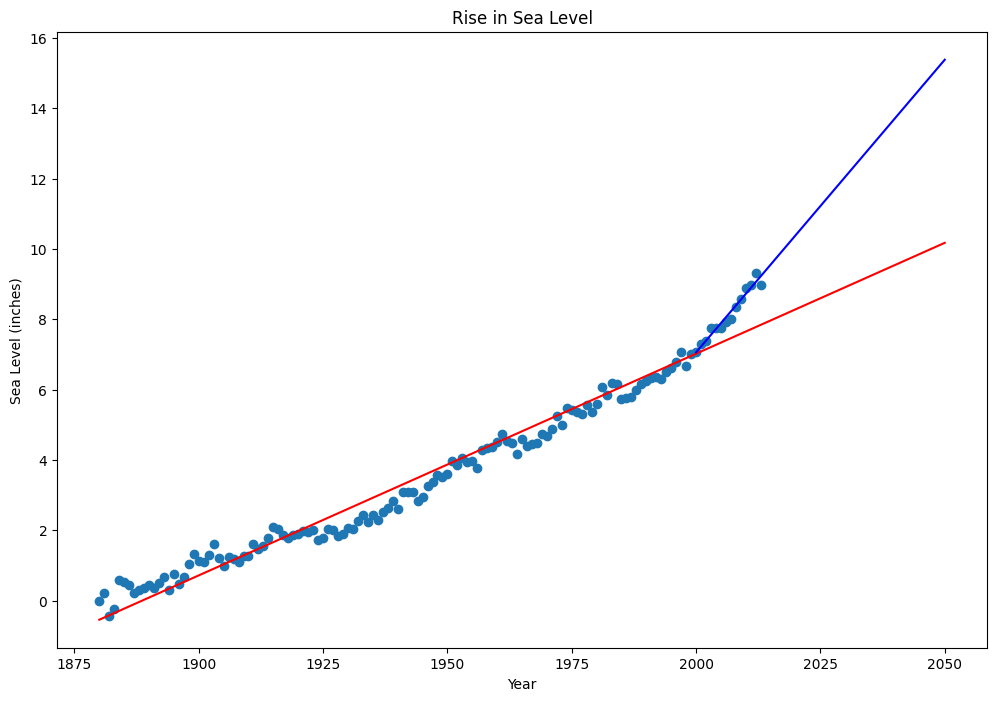

In [ ]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    scatter_df = df[['Year', 'CSIRO Adjusted Sea Level']]
    #no null values
    scatter_df.isna().any()
    x = scatter_df['Year']
    y=scatter_df['CSIRO Adjusted Sea Level']
    fig, ax = plt.subplots(figsize = (12, 8))
    ax = plt.scatter(x, y)

    # Create first line of best fit
    results = linregress(x, y)
    extrap_x = range(x[0], 2051, 1)
    ax = plt.plot(range(x[0], 2051, 1), results.intercept + results.slope*extrap_x, 'r', label='fitted line')

    
    data_since_2000 = df[df['Year'] >= 2000]
    data_since_2000.head()
    x_since_2000 = data_since_2000['Year']
    y_since_2000 = data_since_2000['CSIRO Adjusted Sea Level']
    results_since_2000 = linregress(x_since_2000, y_since_2000)
    extrap_x2 = range(2000, 2051, 1)
    print(extrap_x2)
    ax = plt.plot(extrap_x2, results_since_2000.intercept + results_since_2000.slope*extrap_x2, 'b', label='fitted line 2')
    # Add labels and title

    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.xticks()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()
draw_plot()

